
## <span style = 'color:green'>Detect credit card fraud transactions using Logistic Regression</span>

.



**About the dataset**
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions





In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Model selection and training
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
#Threshold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [4]:
# importing dataset
df = pd.read_csv('creditcard.csv')

<h4> Data Preprocessing </h4>

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info() # no need to deal with null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Checking for duplicate records
df.duplicated().sum()

1081

In [5]:
# we found 1081 duplicate records and now we are dropping those 
df.drop_duplicates(inplace=True)
print(f'New dataset without duplicates contains {df.shape[0]} rows and {df.shape[1]} columns')

New dataset without duplicates contains 283726 rows and 31 columns


<h4> EDA and Feature Engineering </h4>

In [ ]:
# defining colours
colors = sns.color_palette("Set2")
colors

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [ ]:
# Here all columns are numerical columns so we can directly plot countplot,boxplot,distplot etc
# Defining a function for representing numerical columns
def numerical_plots(column_name):
    fig,axes = plt.subplots(1,2,figsize = (15,4))
    fig.suptitle(f'Plots for column {column_name}')
    # Histogram
    sns.histplot(data=df,x=column_name,ax=axes[0],color=colors[1])
    axes[0].set_title(f'Histogram for {column_name}')
    # Boxplot
    sns.boxplot(data=df,x=column_name,ax=axes[1],color=colors[2])
    axes[1].set_title(f'Boxplot for {column_name}')

    plt.show()

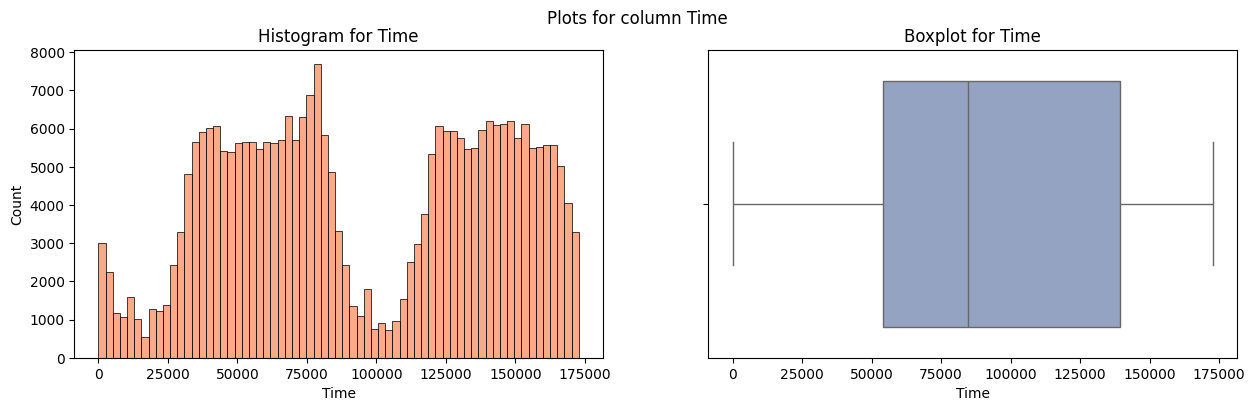

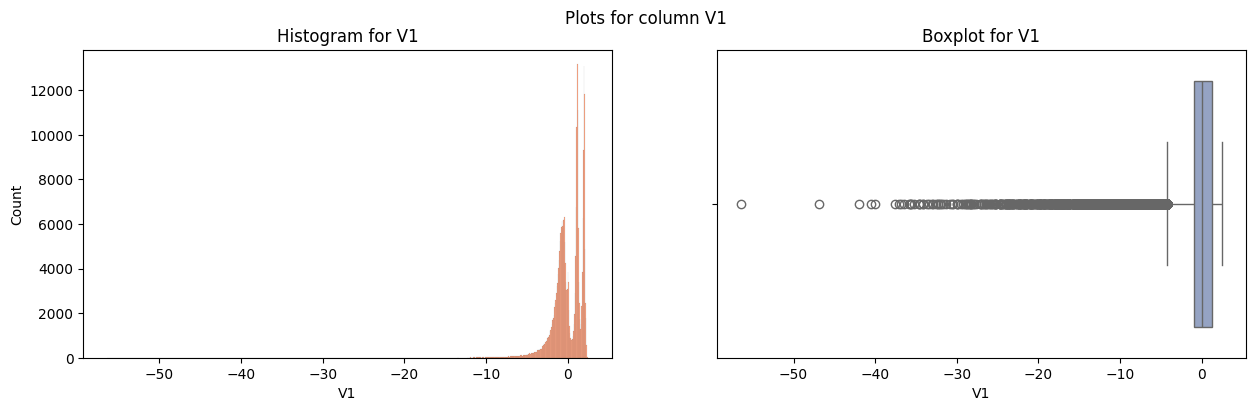

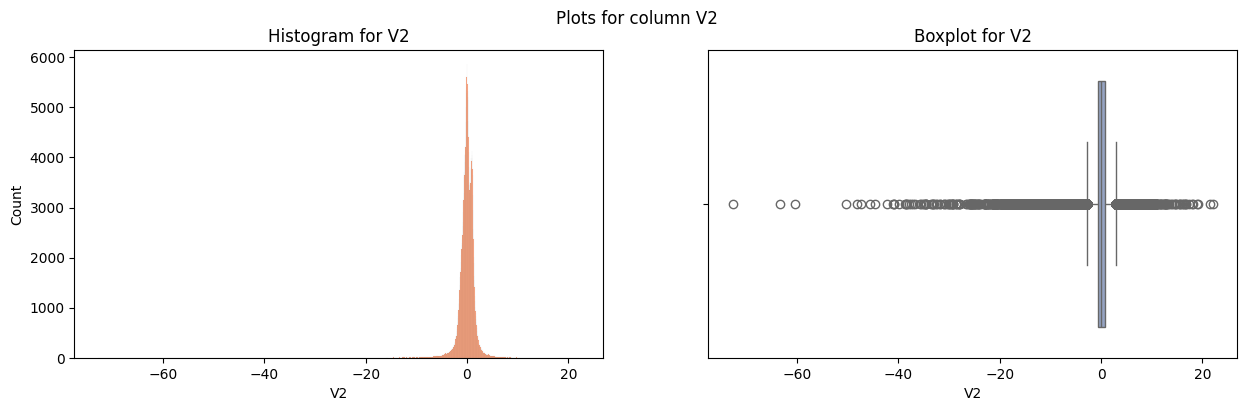

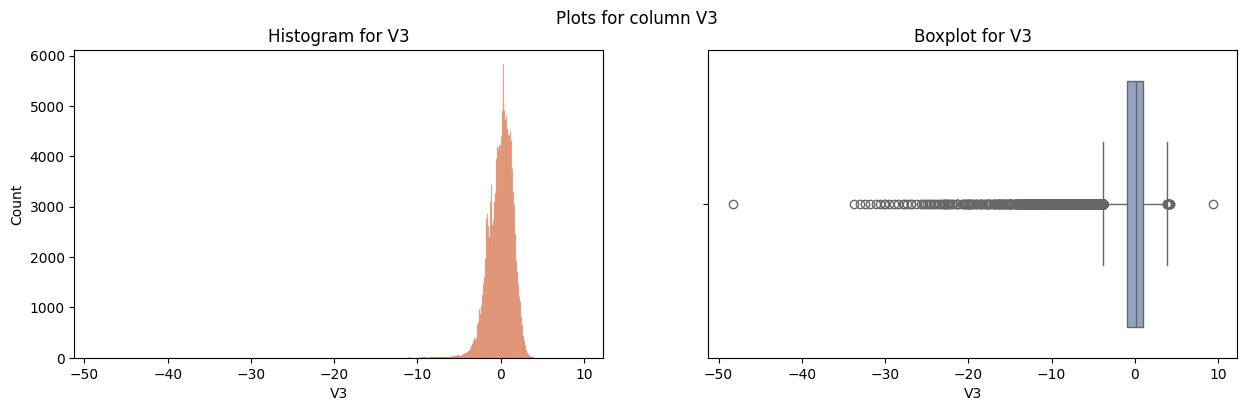

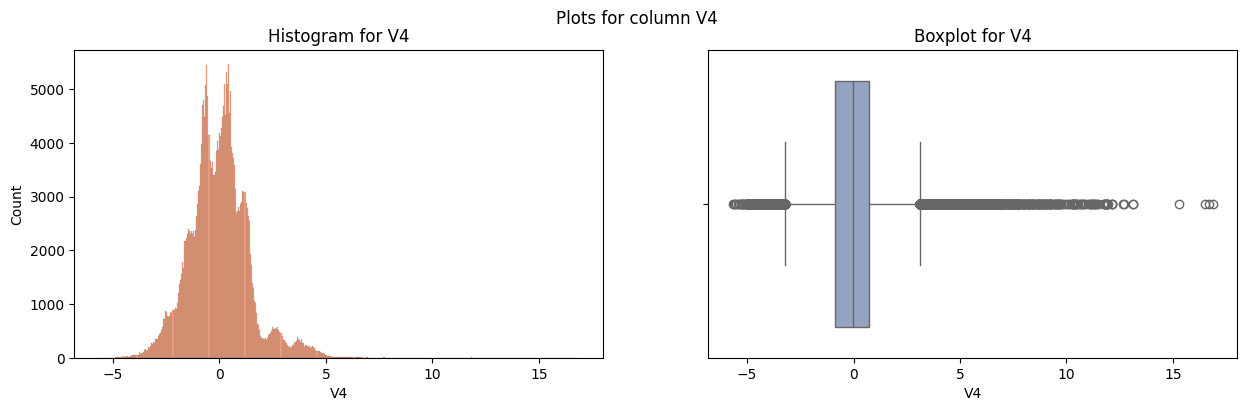

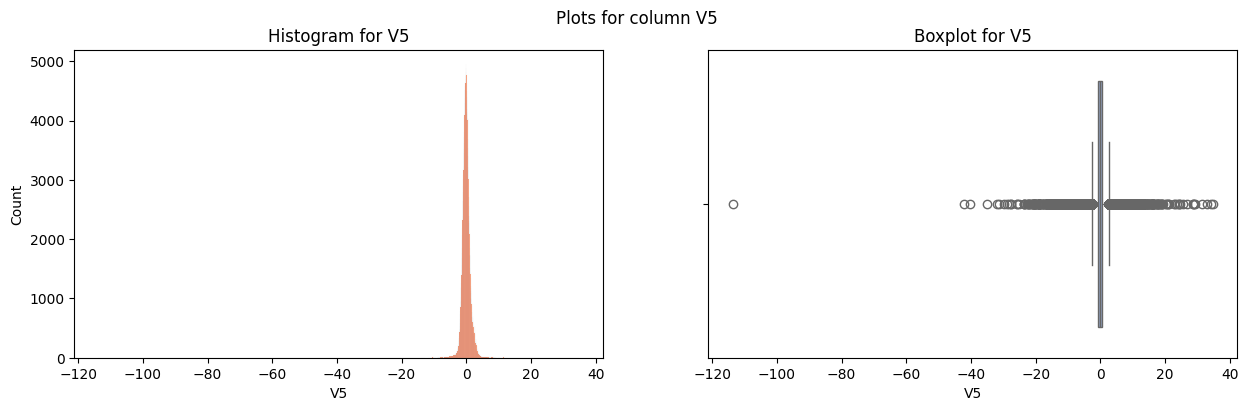

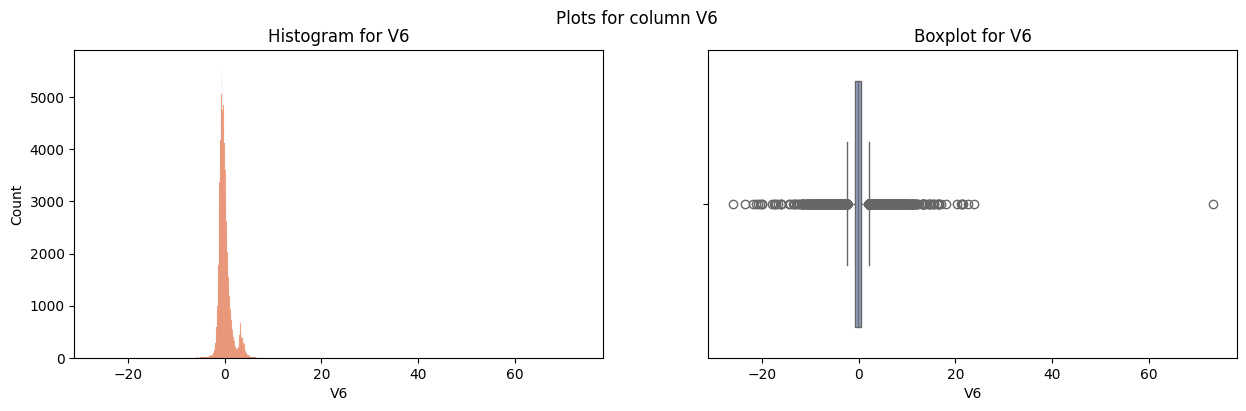

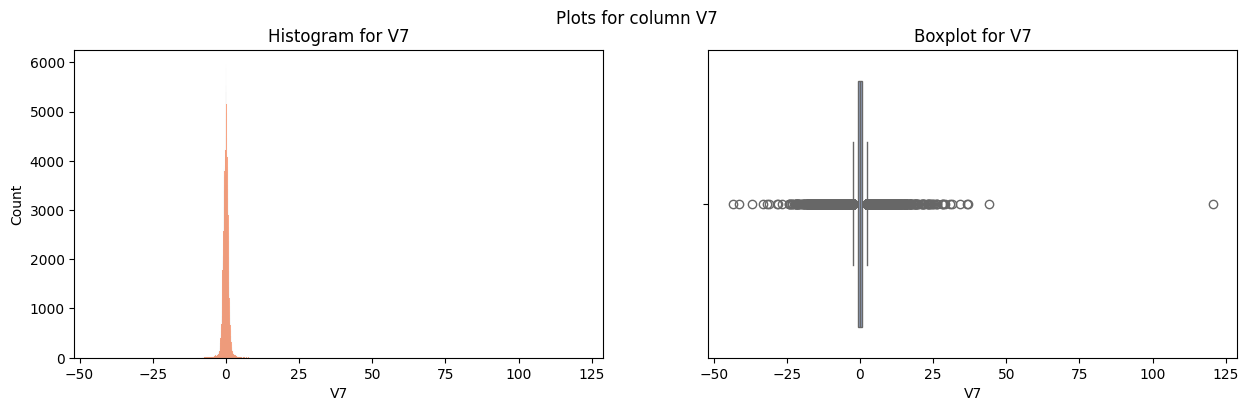

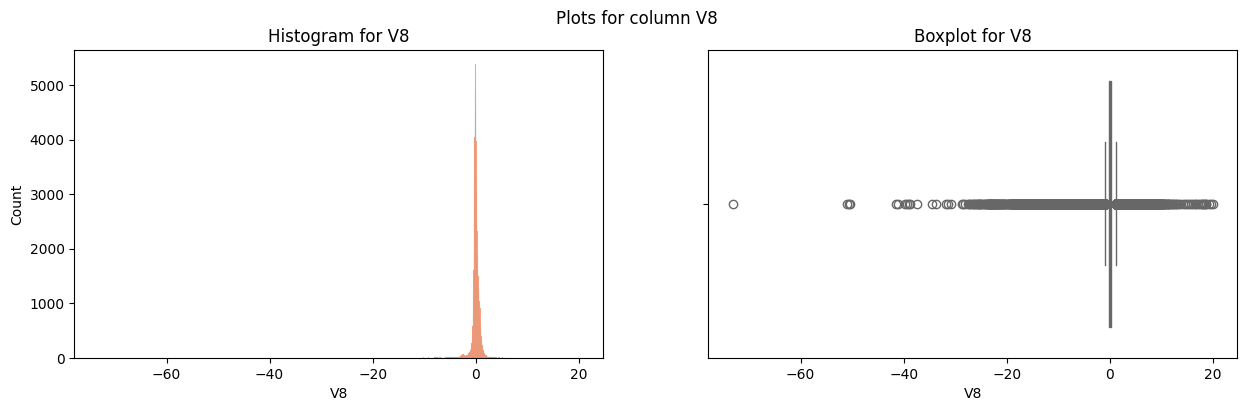

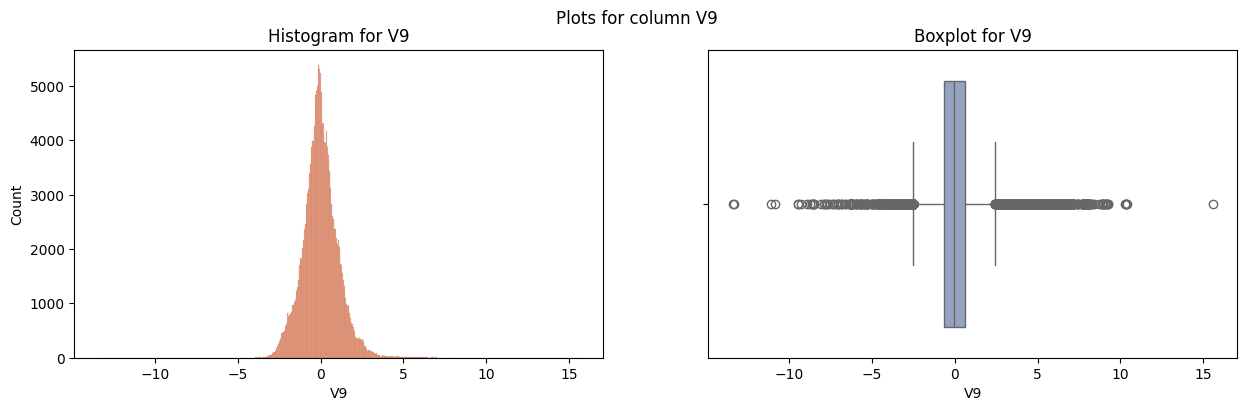

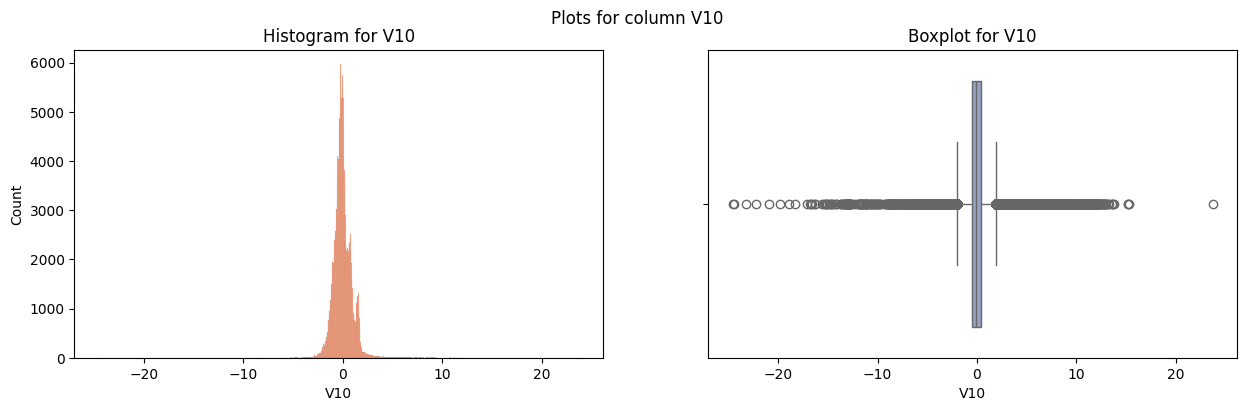

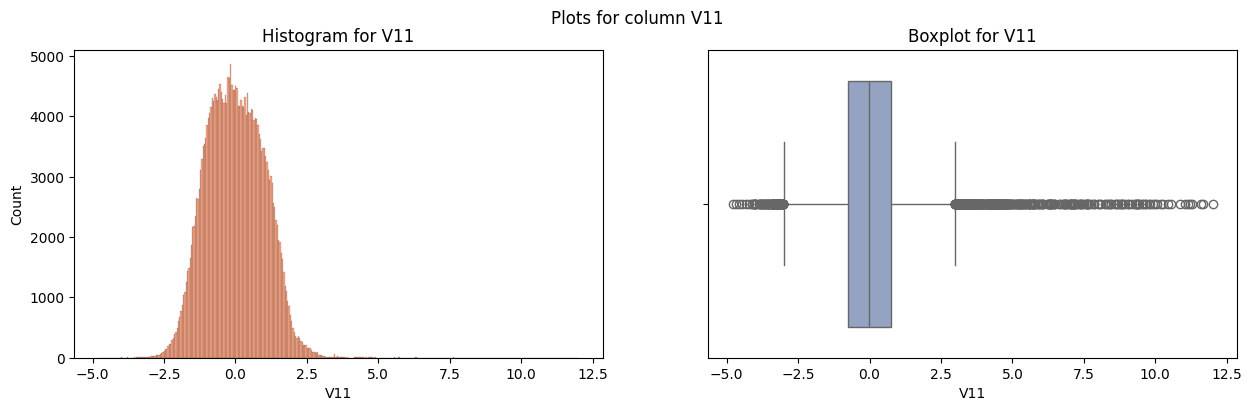

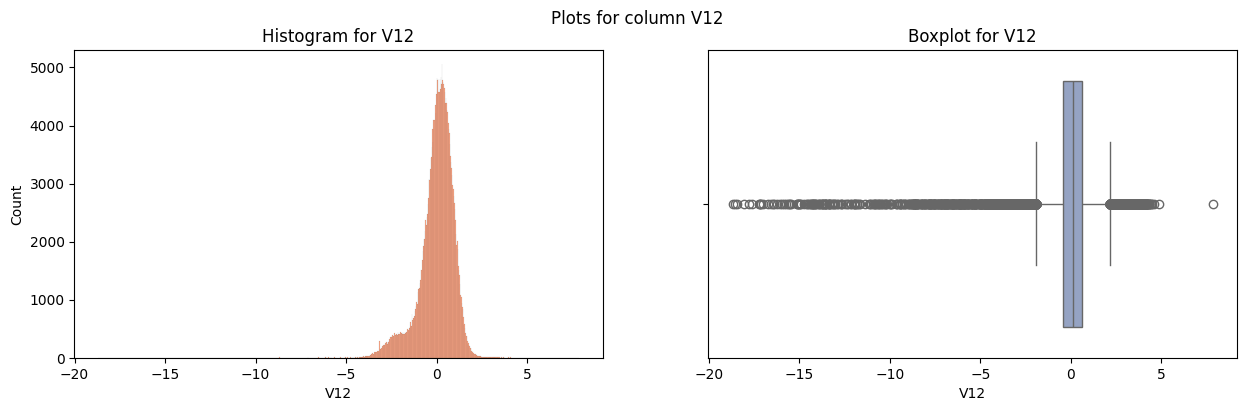

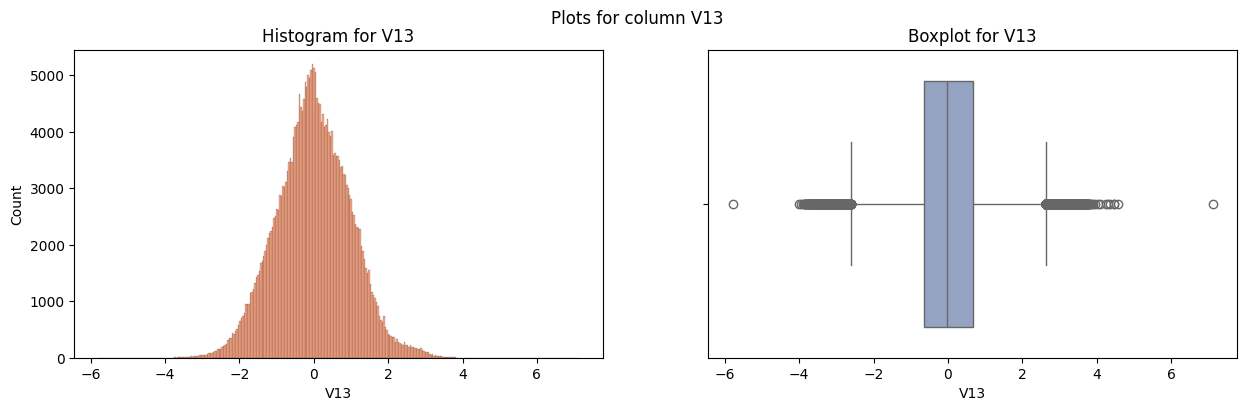

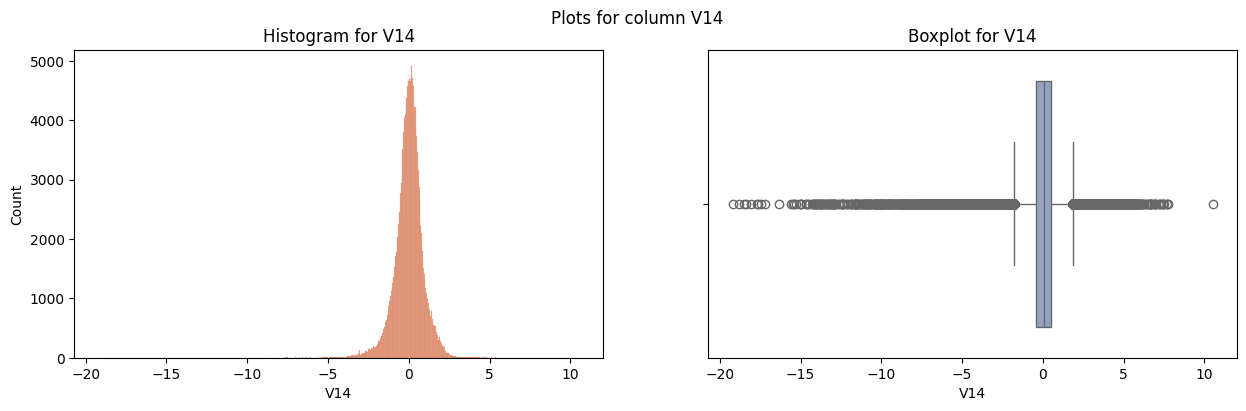

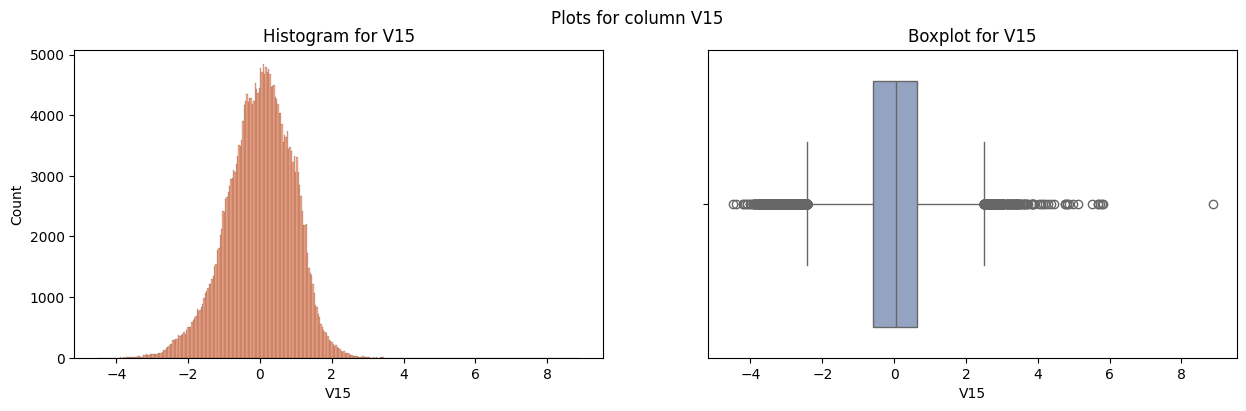

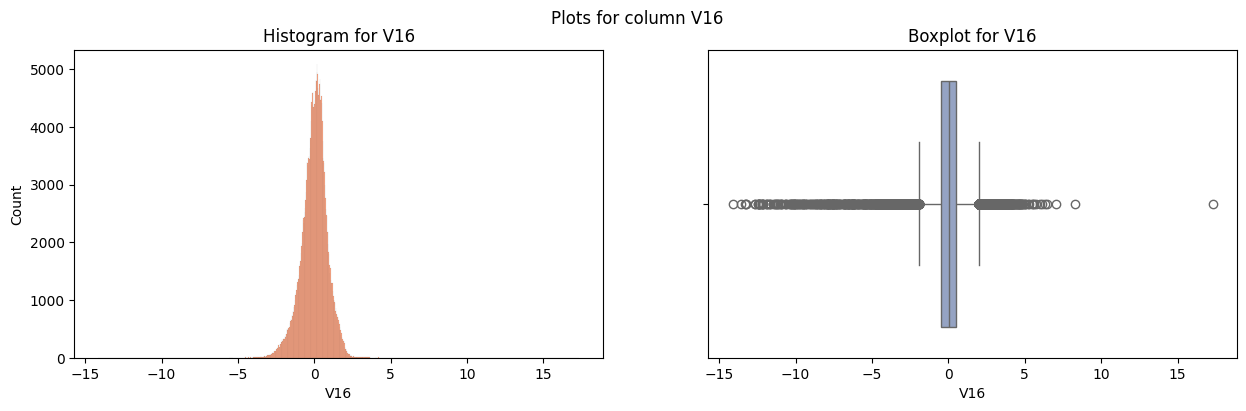

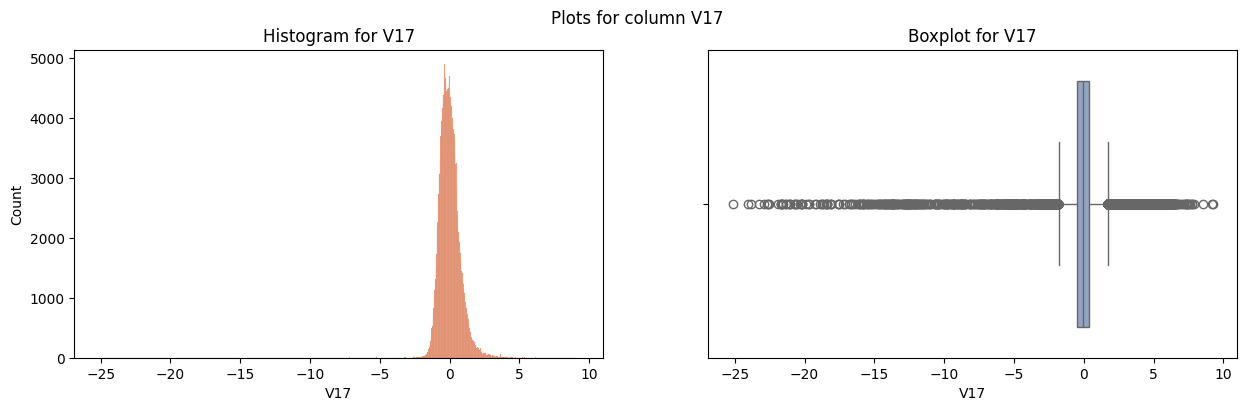

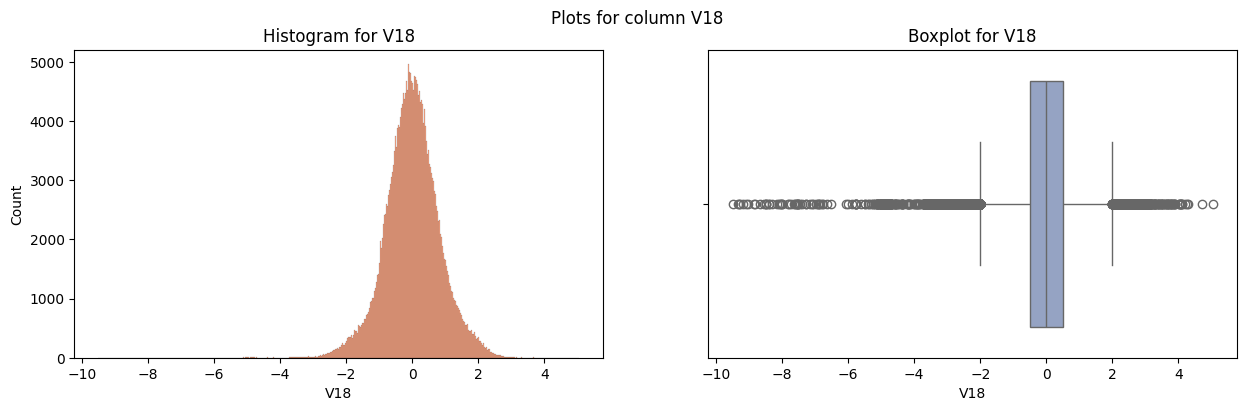

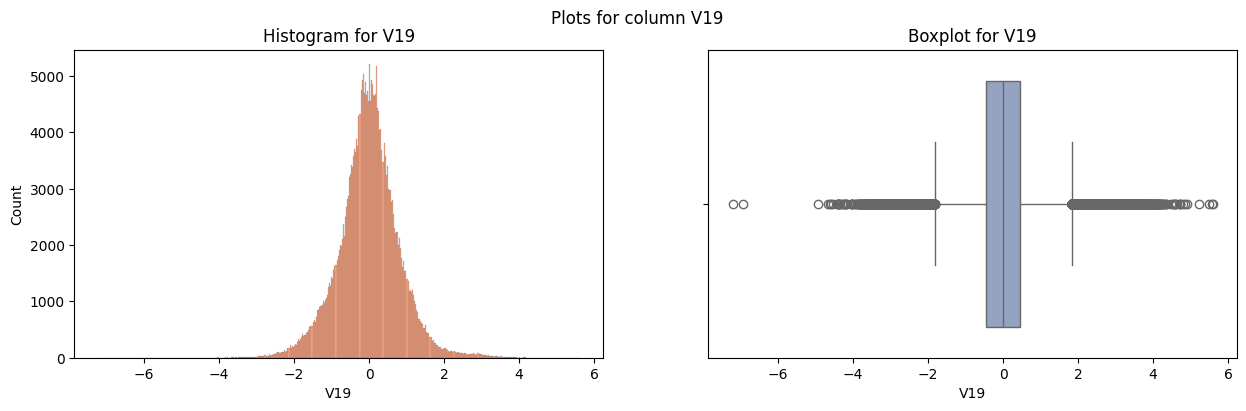

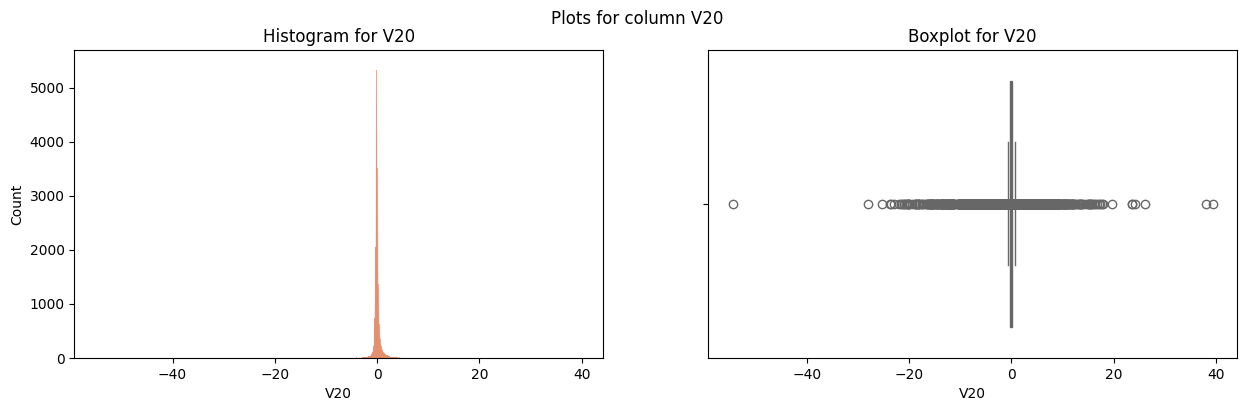

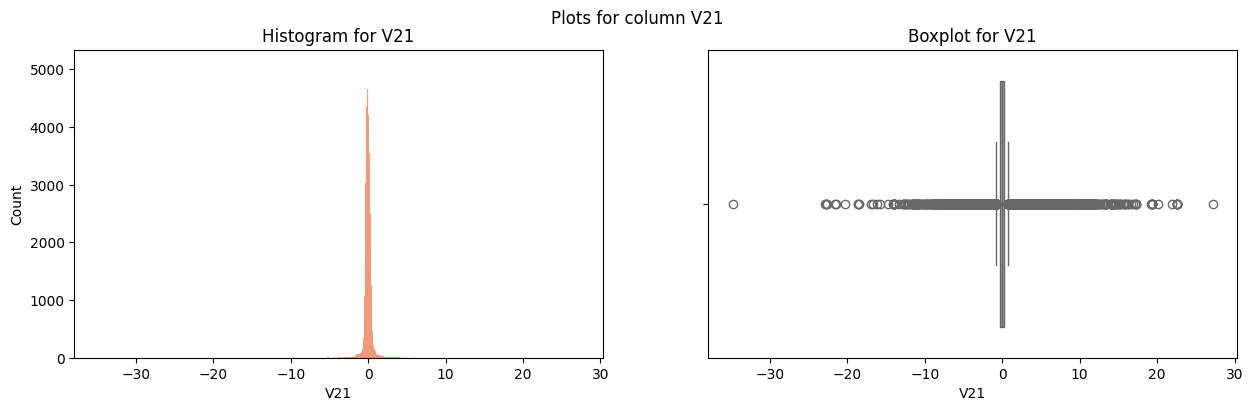

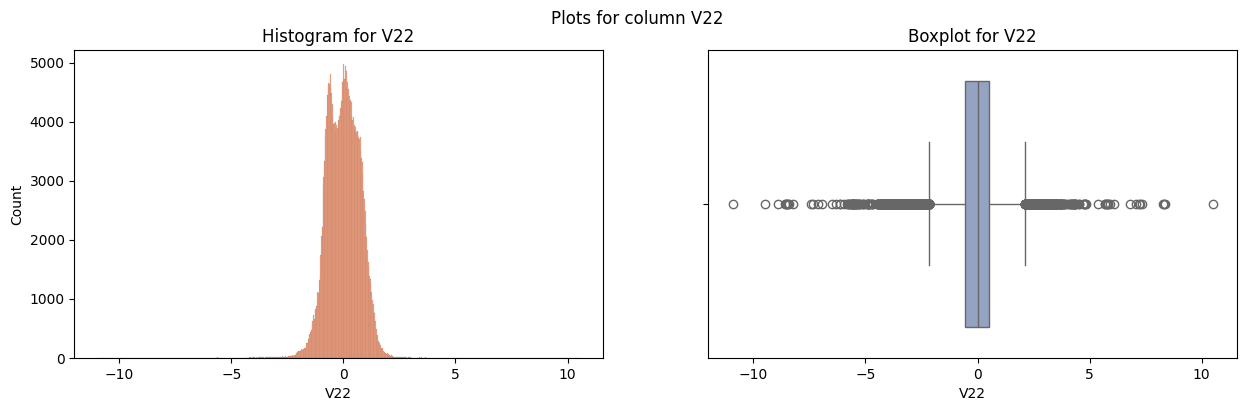

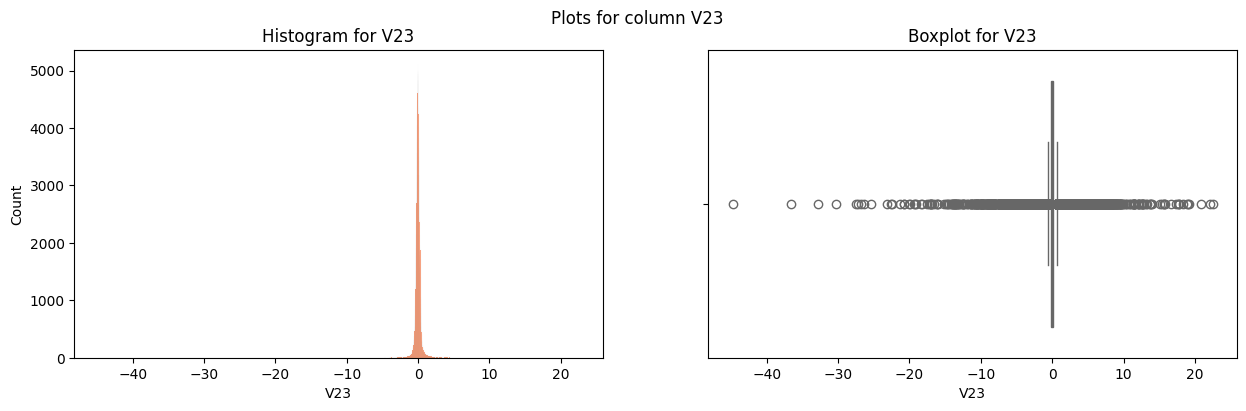

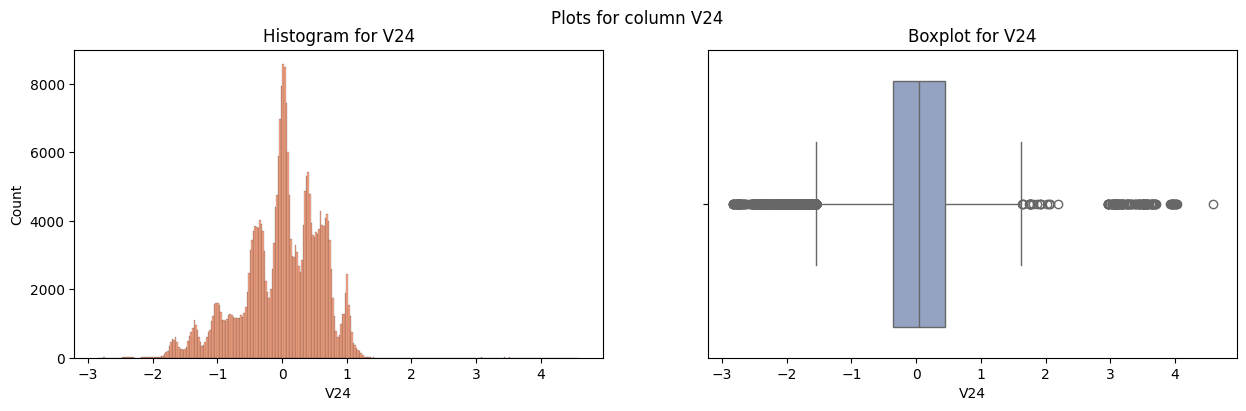

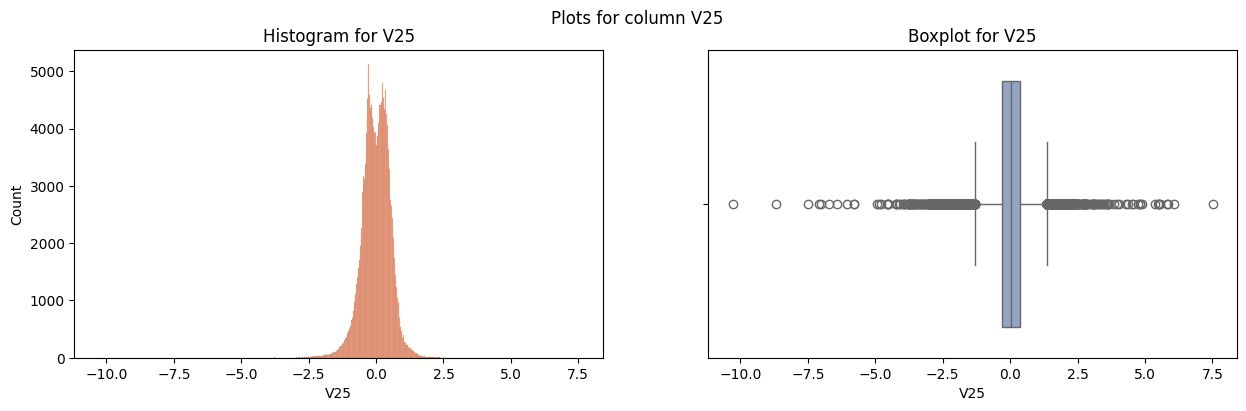

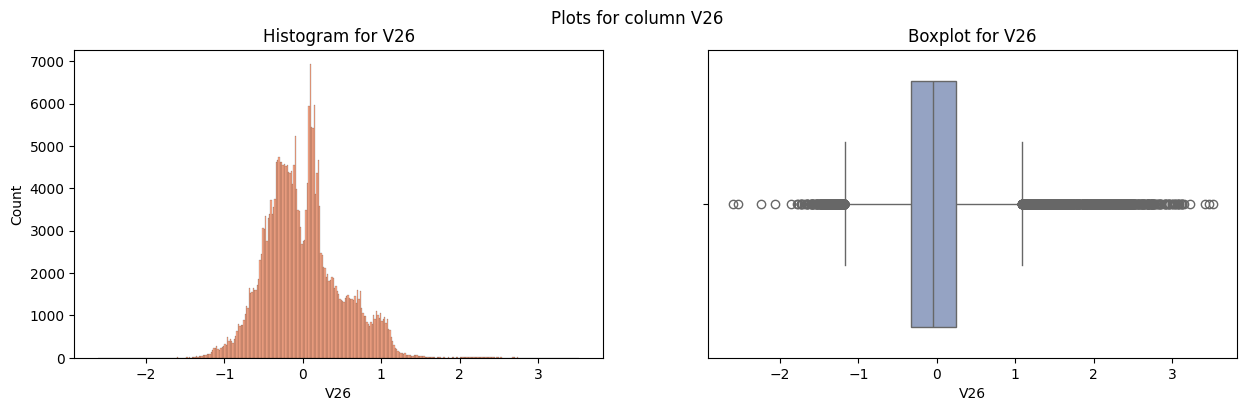

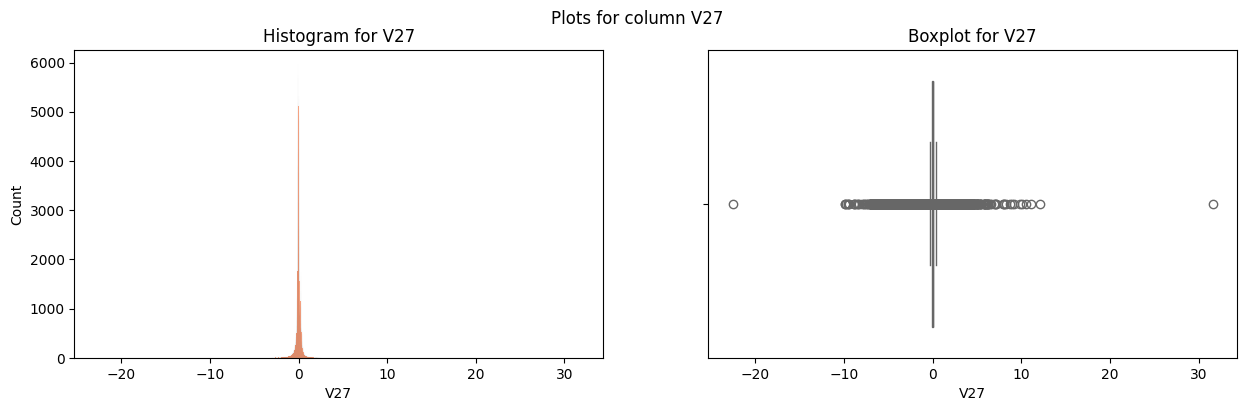

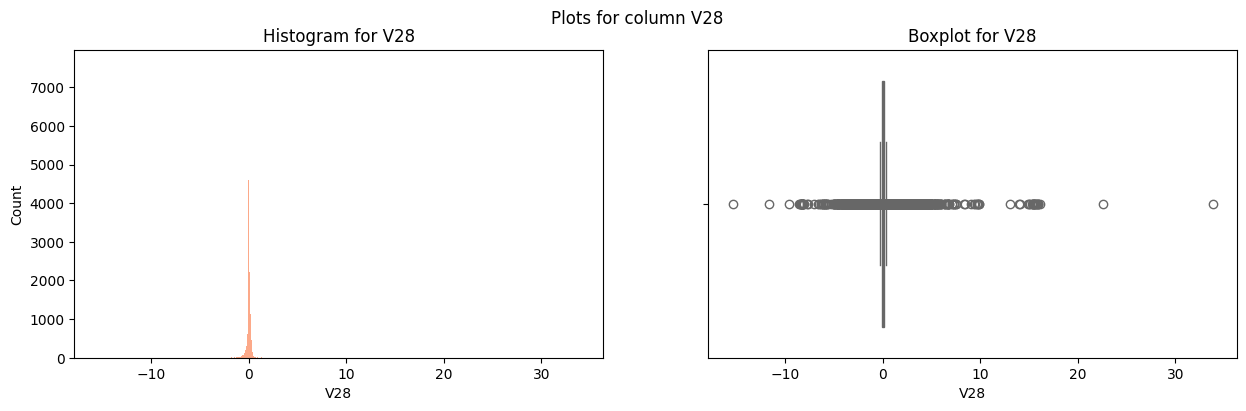

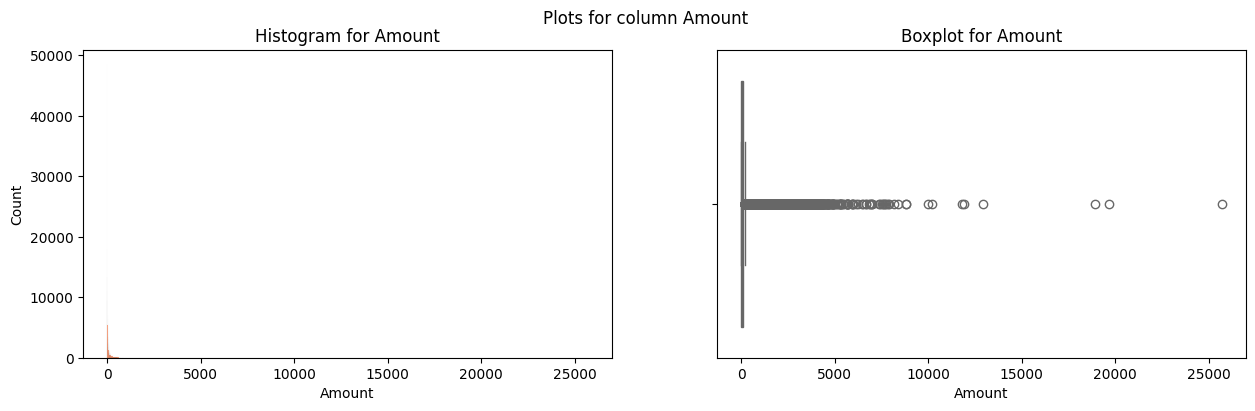

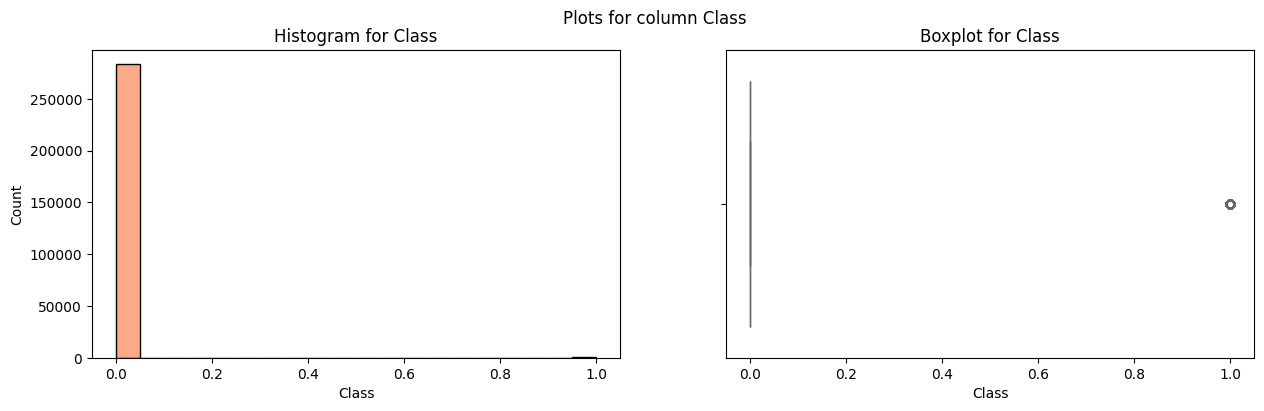

In [ ]:
# Plotting histogram and boxplot for all numerical columns
for i in df.columns:
    numerical_plots(i)

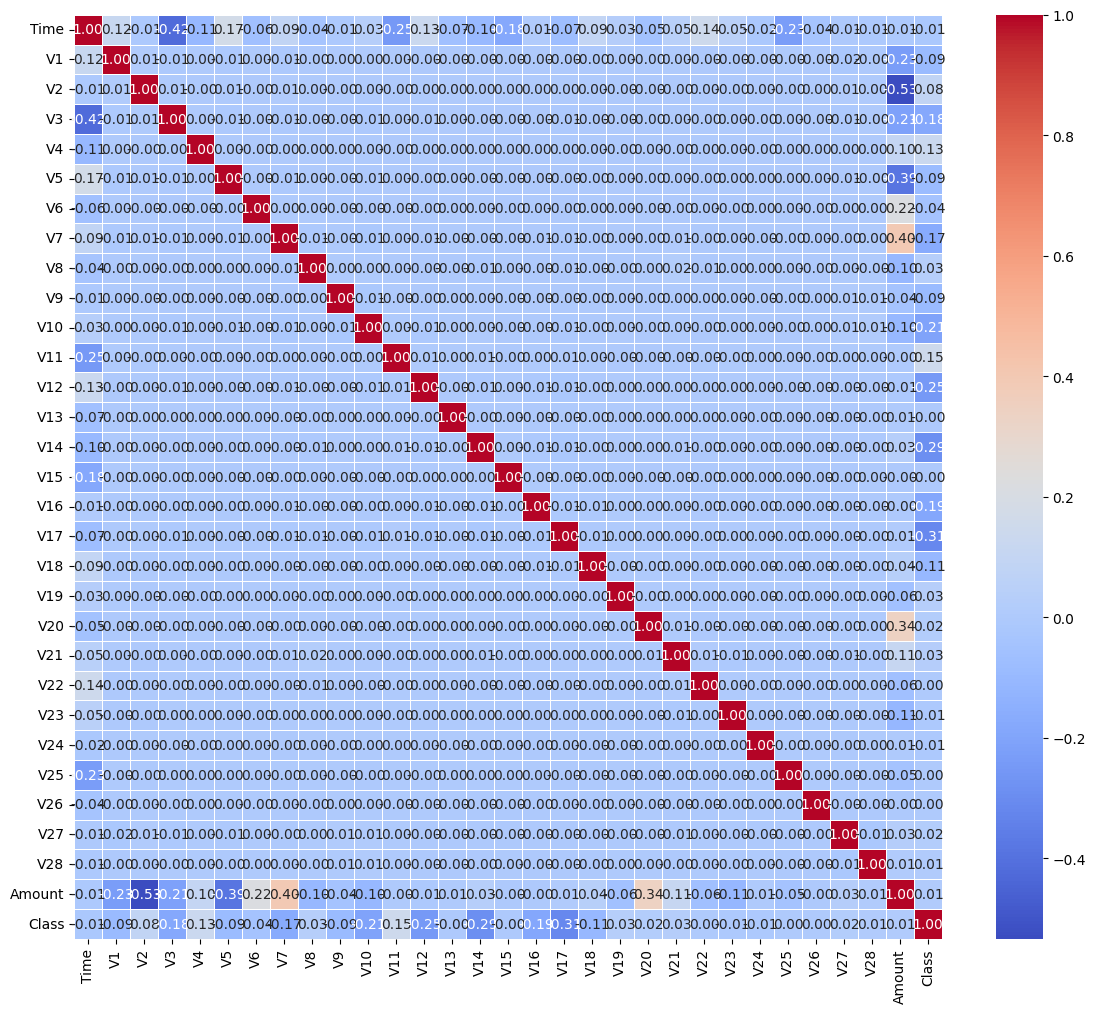

In [6]:
# Checking the correlation between all numerical columns
correlation_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.show()

<h4> Inferences </h4>
<ul>
<li> Columns are already PCA transformed so no EDA is needed, All PCA columns are normally distributed</li>
<li> No of fraud cases is very less compared to non fraud cases, i.e the Dataset is unbalanced. So later we can use two methods,one to add threshold or other to use 
resampling technique  </li>
</ul>

<h3> SCALING AND SPLITTING DATA </h3>

In [9]:
# We are scaling data using standard scalar
# splitting data
x_dummy = df.drop(columns=['Class'],axis=1)
Y = df['Class']

In [10]:
#Standard scalar
sc = StandardScaler()
X = sc.fit_transform(x_dummy)

In [11]:
#Splitting data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print(f'x_train : {x_train.shape},y_train : {y_train.shape},x_test : {x_test.shape},y_test : {y_test.shape}')

x_train : (226980, 30),y_train : (226980,),x_test : (56746, 30),y_test : (56746,)


<h2> LOGISTIC REGRESSION </h2>

In [13]:
# Defining a function for training model and calculating classification report
def find_logistic_regression(x_train,y_train,x_test):
    # calling logistic regression model and fitting data
    lgr = LogisticRegression()
    lgr.fit(x_train,y_train)
    # prediction for train data
    y_pred_train = lgr.predict(x_train)
    # prediction for test data
    y_pred_test = lgr.predict(x_test)
    # classification report for train model
    y_train_cl_report = classification_report(y_train,y_pred_train,target_names = ['Non Fraud','Fraud'])
    # classification report for test model
    y_test_cl_report = classification_report(y_test,y_pred_test,target_names = ['Non Fraud','Fraud'])
    # printing the classification report and returning y_test_pred and logistic regression model
    print('_' * 100)
    print('CLASSIFICATION REPORT FOR TRAIN MODEL')
    print('_' * 100)
    print(y_train_cl_report)
    print('_' * 100)
    print('CLASSIFICATION REPORT FOR TEST MODEL')
    print('_' * 100)
    print(y_test_cl_report)
    return y_pred_test,lgr

In [14]:
# calling function for given train and test data
y_pred,lgr = find_logistic_regression(x_train,y_train,x_test)

____________________________________________________________________________________________________
CLASSIFICATION REPORT FOR TRAIN MODEL
____________________________________________________________________________________________________
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00    226594
       Fraud       0.89      0.63      0.74       386

    accuracy                           1.00    226980
   macro avg       0.94      0.81      0.87    226980
weighted avg       1.00      1.00      1.00    226980

____________________________________________________________________________________________________
CLASSIFICATION REPORT FOR TEST MODEL
____________________________________________________________________________________________________
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56659
       Fraud       0.83      0.55      0.66        87

    accuracy                  

<h4> Inferences </h4>
<ul>
<li> From the above precision,recall and F1 score we can conclude that over data is neither overfit not underfit </li>
<li> Accuracy shown in classification report is 1 because we have very large no of non fraud transactions</li>
<li> Here we want to change model such that we want to concentrate more on fraud transactions, Since the f1 and recall score for fraud case is very less compared to non fraud</li>
</ul>

In [15]:
# Defining a custom function for confusion matrix
def plot_confusion_matrix(y_test,y_pred):
    cnfn_matrx = confusion_matrix(y_test,y_pred)
    labels = ['Non Fraud','Fraud']
    sns.heatmap(cnfn_matrx,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

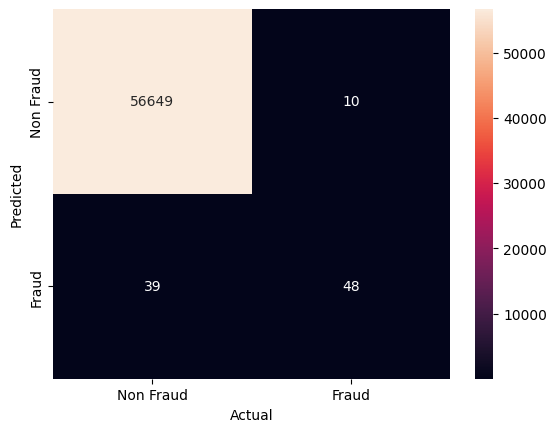

In [16]:
# ploting confusion matrix for above logistic regression model
plot_confusion_matrix(y_test,y_pred)

<h3> RESAMPLING TECHNIQUE </H3>

In [17]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<li> Here count of legit transactions is very much higher compared to fraud cases. So we want to randomly remove some instances from the majority class without
losing information of data </li>
<li> Creating two dataset with equal data points for both the cases</li>

In [18]:
# Different df for both groups
df1 = df[df['Class'] == 0].sample(n = 473,random_state = 42)
df2 = df[df['Class'] == 1].sample(n = 473,random_state = 42)
print(f'Non fraud df with shape {df1.shape} and Fraud df with shape {df2.shape}')

Non fraud df with shape (473, 31) and Fraud df with shape (473, 31)


In [19]:
#combining them
df_final = pd.concat([df1,df2],ignore_index=True)
df_final['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

<h3> SPLITTING AND TRAINING MODEL </h3>

In [20]:
# splitting for x and y
X_balanced_dummy = df_final.drop(columns=['Class'],axis=1)
Y_balanced = df_final['Class'] 

In [21]:
# Scaling independent variables using Standard Scalar
sc_bal = StandardScaler()
X_balanced = sc_bal.fit_transform(X_balanced_dummy)

In [25]:
# Splitting for train and test
x_train_bal,x_test_bal,y_train_bal,y_test_bal = train_test_split(X_balanced,Y_balanced,test_size=0.2,random_state=0)
print(f'x_train : {x_train_bal.shape},y_train : {y_train_bal.shape},x_test : {x_test_bal.shape},y_test : {y_test_bal.shape}')

x_train : (756, 30),y_train : (756,),x_test : (190, 30),y_test : (190,)


In [27]:
# training model and printing classification report
lgr = LogisticRegression()
lgr.fit(x_train_bal,y_train_bal)
# prediction for train data
y_pred_train_bal = lgr.predict(x_train_bal)
# prediction for test data
y_pred_test_bal = lgr.predict(x_test_bal)
# classification report for train model
y_train_cl_report = classification_report(y_train_bal,y_pred_train_bal)
# classification report for test model
y_test_cl_report = classification_report(y_test_bal,y_pred_test_bal)
# printing the classification report and returning y_test_pred and logistic regression model
print('_' * 100)
print('CLASSIFICATION REPORT FOR TRAIN MODEL')
print('_' * 100)
print(y_train_cl_report)
print('_' * 100)
print('CLASSIFICATION REPORT FOR TEST MODEL')
print('_' * 100)
print(y_test_cl_report)

____________________________________________________________________________________________________
CLASSIFICATION REPORT FOR TRAIN MODEL
____________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       378
           1       0.98      0.92      0.95       378

    accuracy                           0.95       756
   macro avg       0.95      0.95      0.95       756
weighted avg       0.95      0.95      0.95       756

____________________________________________________________________________________________________
CLASSIFICATION REPORT FOR TEST MODEL
____________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        95
           1       0.97      0.93      0.95        95

    accuracy                  

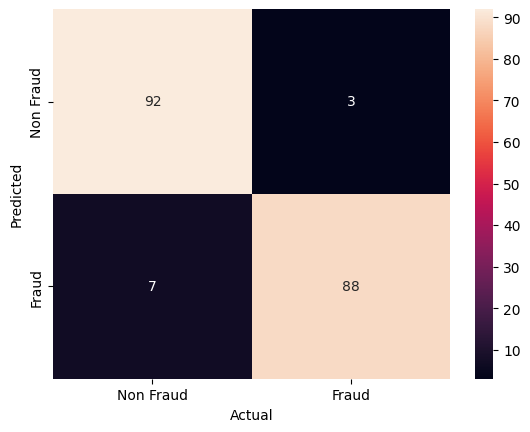

In [28]:
# plotting confusion matrix
plot_confusion_matrix(y_test_bal,y_pred_test_bal)

<h4> CONCLUSION </h4>
<ul>
<li> Logistic regression model is capable for classifying the data with high accuracy and score</li>
<li> Sampling technique is used since the dataset is unbalanced for distinguishing both dependent cases</li>
<li> Using more feature engineering techniques and additional evaluation metrix we can create more insights into this model which helps in making more decisions</li>
</ul>

# Thank you